# Gathering, Plotting and Analyzing Brexit Data with Python and Guardian API 

## 1. Dependencies 

In [59]:
import requests
from pprint import pprint
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

## 2. API Mapper

- guardianApi is an attempt to create a mapper which maps Object Oriented Design to API. 
- With help of guardianApi, developers won't have to manually create or change an API. 
- Instead they can create and object of the API and then add the parameters with help of methods.
- There are two default methods to add the parameters:
    - addQuery
    - addFromDate
- And an addOtherParams to add anyother parameter to the guardian api.
- It takes two values: parameter name and paramter value.

In [22]:
class guardianApi:
    def __init__(self, key):
        self.base_api = "https://content.guardianapis.com/search?api-key="+key.strip()
        self.api = self.base_api
        self.params = {}

    def constructApi(self):
        self.api = self.base_api
        for key, value in self.params.items():
            self.api += f"&{key}={value}"
            
    def addQuery(self, query):
        self.params["q"] = query.strip()
        self.constructApi() 

    def addFromDate(self, date):
        self.params["from-date"] = date.strip()
        self.constructApi()
        
    def addOtherParams(self, param_name, param_value):
        self.params[param_name] = param_value
        self.constructApi()
        
    def response(self):
        response = requests.get(self.api)
        return response.json()
        
    def createDict(self, page_size = 10):
        total_articles = brexit_api.response()["response"]["total"]
        freq_dict = {}
        for pageNum in range(1,total_articles//page_size+2):
            self.addOtherParams("page",pageNum)
            response = self.response()
            for i in range(len(response["response"]["results"])):
                date_key = response["response"]["results"][i]['webPublicationDate']
                date_key = datetime.strptime(date_key, '%Y-%m-%dT%H:%M:%SZ')
                date_key = date_key.date()
                freq_dict[date_key] = freq_dict.get(date_key, 0) + 1
        return freq_dict

## Generating the API & Creating Frequency Dictionary

- Add your own key in the my_key variable.
- freq_dict is the Frequency Dicionary. 

In [23]:
my_key = ""
brexit_api = guardianApi(my_key)
brexit_api.addQuery("brexit")
brexit_api.addFromDate("2018-01-01")
brexit_api.addOtherParams("page-size",50)
brexit_api.addOtherParams("order-by","oldest")
freq_dict = brexit_api.createDict(50)

## Creating Data Frame with frequency dictionary  

In [24]:
df = pd.DataFrame.from_dict(freq_dict.items())
print(df.head())

            0   1
0  2018-01-01  13
1  2018-01-02  15
2  2018-01-03  16
3  2018-01-04  19
4  2018-01-05  21


## Saving the Data Frame to csv file

- Save the dataframe as the csv file.
- Creating the Frequency Dictionary is a costly process and need not to be executed everytime.
- Whereas importing a csv file is a fast process and hence is preferable.

In [26]:
df.to_csv('brexit_timeseries.csv', index=False)

## 3. Analyzing the data 

## Average value of the Number of Articles 

In [28]:
df[1].mean()

19.380890052356023

## Other statistics of the data

- There are 1528 records i.e. the number of days when Brexit related article was published.
- On an average, 19 articles were print in those days.
- Number of days since 01-01-2018 to today 09-03-2022 is 1528.
- It means that each day atleast one article was published.
- The minimum number of article published is 1.
- The maximum number of article published is 77. 

In [32]:
df[1].describe()

count    1528.000000
mean       19.380890
std        11.402682
min         1.000000
25%        10.000000
50%        16.500000
75%        27.000000
max        77.000000
Name: 1, dtype: float64

## What day was most article written?

- Below data show the top 10 days when the highest number of articles were published.
- It is observed that the highest number of articles were published on 2019-12-13.

In [41]:
df.nlargest(n=10, columns=[1])

,0,1
711,2019-12-13,77
380,2019-01-16,69
436,2019-03-13,68
318,2018-11-15,63
611,2019-09-04,61
378,2019-01-14,55
394,2019-01-30,53
352,2018-12-19,52
381,2019-01-17,52
386,2019-01-22,52


## 4. Plotting the time series 

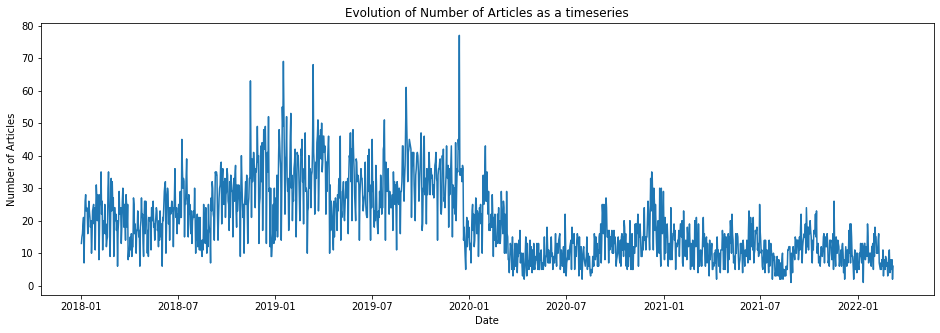

In [60]:
plt.figure(figsize=(16,5))
plt.plot(df[0], df[1])
plt.gca().set(title="Evolution of Number of Articles as a timeseries", xlabel="Date", ylabel="Number of Articles")
plt.show()

## Decrease in the frequency is onserved since 2020 

In [ ]:
date1 = datetime.strptime('2020-01-01', "%Y-%m-%d").date()

In [52]:
before_2020 = df.loc[df[0] < date1]
before_2020.head()

,0,1
0,2018-01-01,13
1,2018-01-02,15
2,2018-01-03,16
3,2018-01-04,19
4,2018-01-05,21


In [54]:
after_2020 = df.loc[df[0] >= date1]
after_2020.head()

,0,1
730,2020-01-01,13
731,2020-01-02,11
732,2020-01-03,13
733,2020-01-04,7
734,2020-01-05,16


In [55]:
len(before_2020)+len(after_2020)

1528

## Statistics of the number of article published before 2020-01-01


In [56]:
before_2020.describe()

,1
count,730.000000
mean,27.395890
std,10.432525
min,5.000000
25%,20.000000
50%,27.000000
75%,34.000000
max,77.000000


## Statistics of the number of article published since 2020-01-01


In [57]:
after_2020.describe()

,1
count,798.000000
mean,12.048872
std,6.074103
min,1.000000
25%,8.000000
50%,11.000000
75%,15.000000
max,43.000000


## Unusual event in the time series

- It is evident from the time series that the frequency of article has dropped from the year 2020.
- It can be confirmed by the average value of the articles published before and after 2020-01-01.
- The period before 2020 has higher max value, min value and average value of the number of articles.
- It gives an impression that some event must have occurred at the beginning of the year 2020 which might caused such difference.
- Also, the maximum value of the number of articles is observed on 2019-12-13. It signifies the occurrence of an major event happening around that day.

- The date of Brexit is 2020-01-31 which is consistent which our observation above. The finalization of Brexit is the event  which caused the change in the media coverage of the topic and hence decline in the average value of the number of articles.
- Also as confirmed from the EU Calendar, Brexit details were discussed on 2019-12-13 which might have caused the highest number of articles published on that day.